# Project 6 - EDA (Custom Data Analytics Project)

Author: Elom Gbogbo

Date: 2/21/2025

Purpose: The purpose of Project 6 is to create our own explortatory data analysis but using our own dataset to explore data analysis tools like pandas, seaborn, matpotlib using Jupyter. The dataset that will be analyzed in this project is a seaborn dataset about restaurant tips. 

https://github.com/mwaskom/seaborn-data/blob/master/tips.csv

# Import Dependencies

In [256]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import jupyterlab
import pyarrow

# Step 1: Data Acquisition

In [257]:
# Load the dataset in into a padndas DataFrame
df = sns.load_dataset('tips')

print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Step 2: Initial Data Inspection

In [258]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


# Step 3. Initial Descriptive Statistics

In [259]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# Step 4. Initial Data Distribution for Numerical Columns

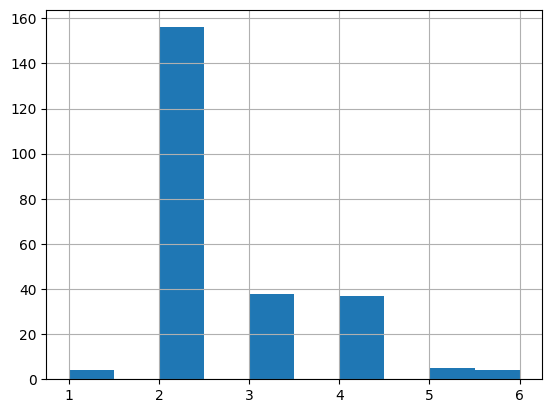

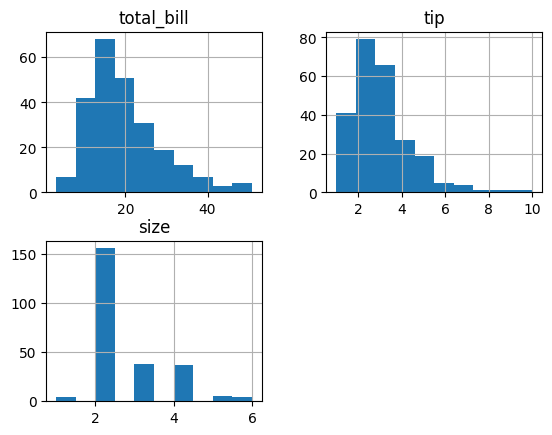

In [260]:
# Inspect histogram by numerical column
df['size'].hist()

# Inspect histogram for all numerical columns
df.hist()

# Show all plots 
plt.show()


### Observations
In this dataset, people came in groups of 2 the most. Most of the total bills were between $10 and $25 dollars. Most tips were between $2 and $4.

# Step 5. Initial Data Distribution for Categorical Columns

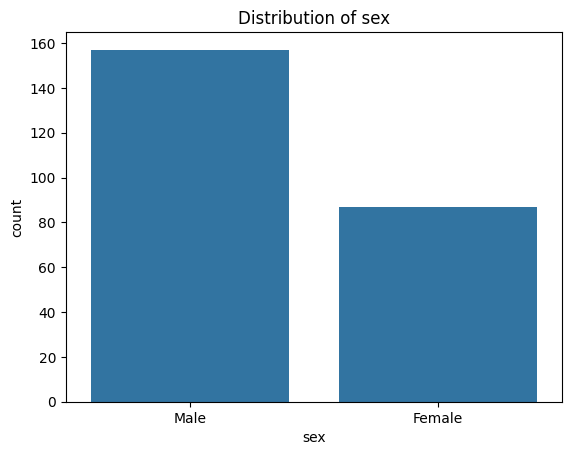

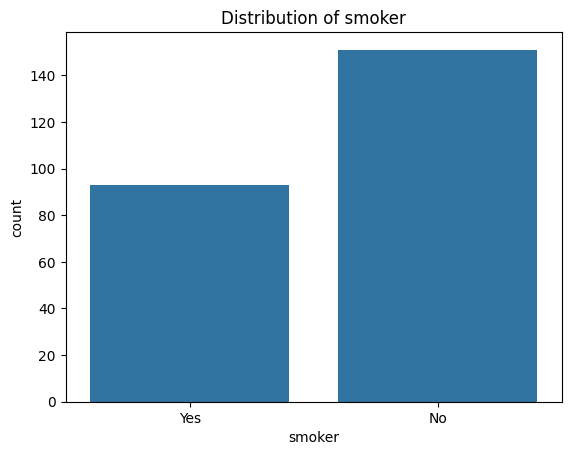

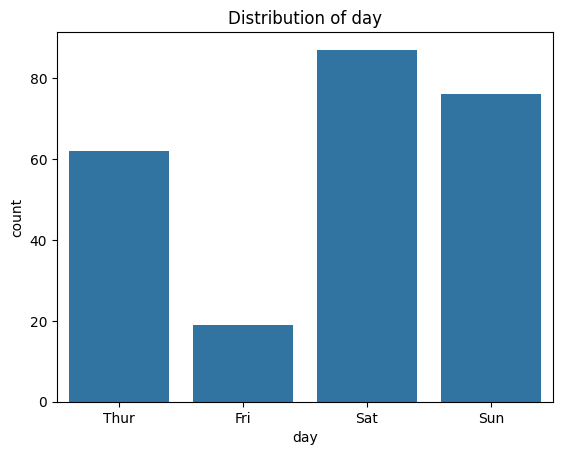

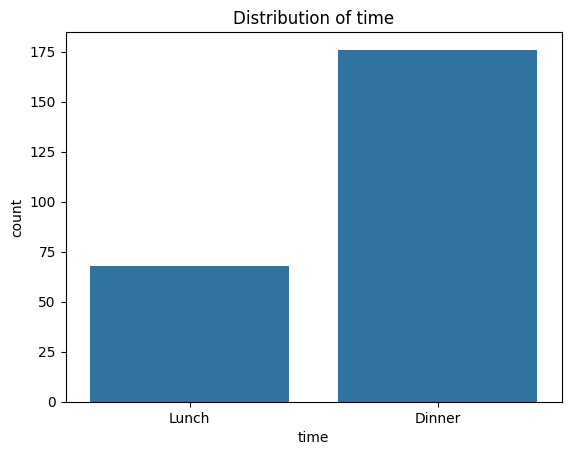

In [261]:
# Inspect value counts by categorical column
df['time'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Observations
In this dataset, more men attended the restaurant than women. The majority of people who visited were not smokers. The busiest days for the restaurants were on the weekends (Saturday and Sunday) with Saturday having the most people and Fridays had the least amount of people in the restaurant. More people attended the restaurant during dinner hours instead of lunch hours. 

# Step 6. Initial Data Transformation and Feature Engineering

Here are some transformations made to the dataset.

In [262]:
# Rename the tip column to tip_amount
df.rename(columns={'tip': 'tip_amount'}, inplace=True)

print(df.head())


# Create a new column for tip percentage from the total bill
df['tip_percentage'] = (df['tip_amount'] / df['total_bill']) * 100

print(df[['total_bill', 'tip_amount', 'tip_percentage']].head())

print(df.head())




   total_bill  tip_amount     sex smoker  day    time  size
0       16.99        1.01  Female     No  Sun  Dinner     2
1       10.34        1.66    Male     No  Sun  Dinner     3
2       21.01        3.50    Male     No  Sun  Dinner     3
3       23.68        3.31    Male     No  Sun  Dinner     2
4       24.59        3.61  Female     No  Sun  Dinner     4
   total_bill  tip_amount  tip_percentage
0       16.99        1.01        5.944673
1       10.34        1.66       16.054159
2       21.01        3.50       16.658734
3       23.68        3.31       13.978041
4       24.59        3.61       14.680765
   total_bill  tip_amount     sex smoker  day    time  size  tip_percentage
0       16.99        1.01  Female     No  Sun  Dinner     2        5.944673
1       10.34        1.66    Male     No  Sun  Dinner     3       16.054159
2       21.01        3.50    Male     No  Sun  Dinner     3       16.658734
3       23.68        3.31    Male     No  Sun  Dinner     2       13.978041
4       

# Step 7. Initial Visualizations

Below are three different visualizations that showcase different aspects of the Tips dataset. 

## Visualization 1: Average Tip vs. The Time of Day

Goal: To determine if there is a difference in tip amount based on the time of day.

Chart Type: A bar plot was used to compare data between two categorical columns. 

Chart: 

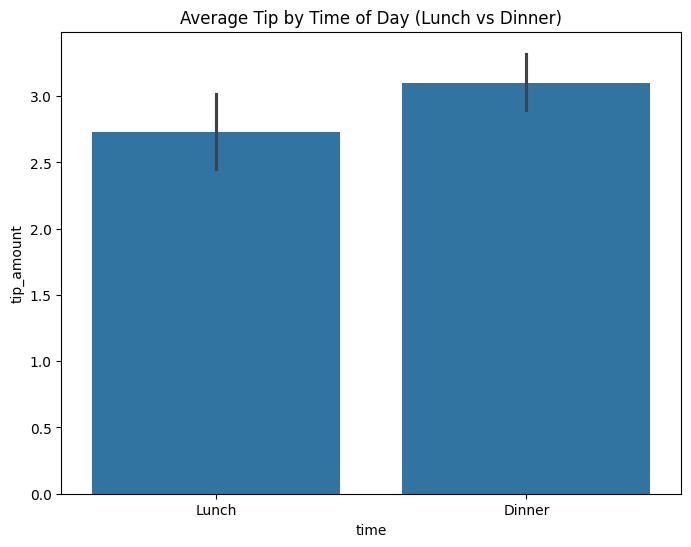

In [263]:
# Bar plot of average tip amount by time of day
plt.figure(figsize=(8,6))
sns.barplot(data=df, x="time", y="tip_amount")
plt.title("Average Tip by Time of Day (Lunch vs Dinner)")
plt.show()

Story: This bar plot suggest that the average tip amount is higer during dinner compared to lunch. This could mean that prices are higher during dinner hours compared to lunch hours. 

## Visualization 2: The Relationship Between Total Bill and Tip Amount

Goal: To determine the relationship between the total bill and tip amount.

Chart Type: A scatter plot is used to compare the data of two numerical columns and their relationship.

Chart:

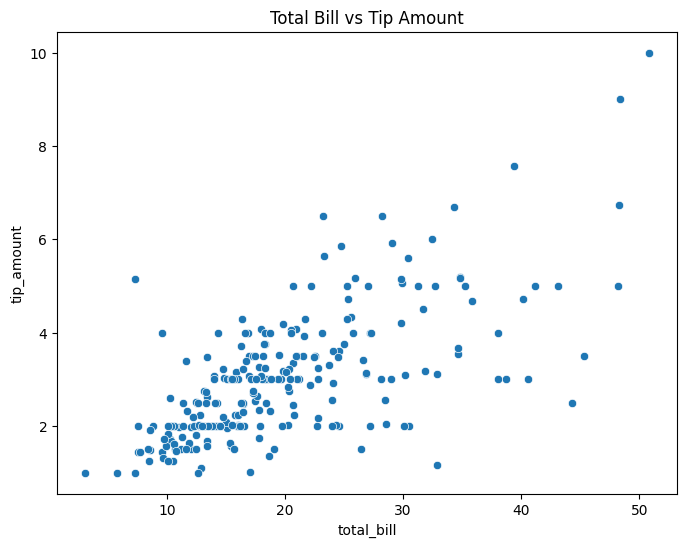

In [264]:
# Scatter plot of total_bill vs tip
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_bill", y="tip_amount")
plt.title("Total Bill vs Tip Amount")
plt.show()

Story: Looking at this scatter plot, we can determine there is a positive correlation between the total bill and tip amount. When the total bill increases, the tip amount also tends to increase. 

## Visualization 3: The Difference In Tip Percentage Based on Gender

Goal: To determine if there is a differnce in the average tip percentage based on gender?

Chart Type: A box plot is used to show the difference in males and females and their tip percentages.

Chart:

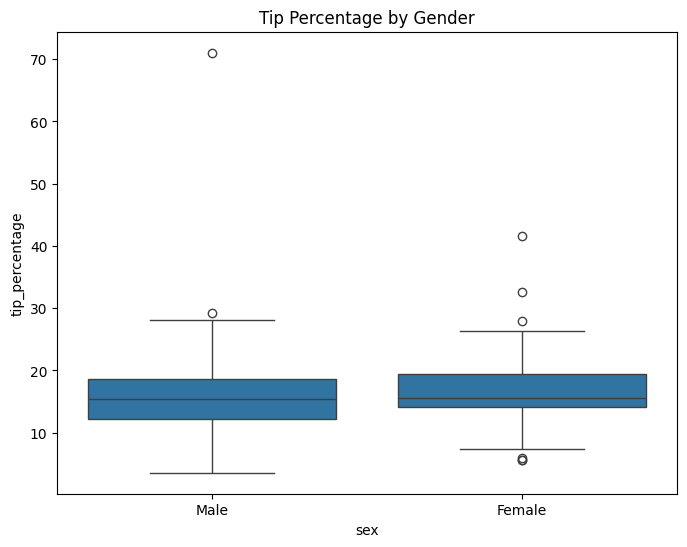

In [265]:
# Box plot by gender for tip percentage
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="sex", y="tip_percentage")
plt.title("Tip Percentage by Gender")
plt.show()

Story: The median tip percentage of both males and females are similar. It does show a broader range for the tip percentage of the males with some outliers. 

# Final Insights
The visualizations provide valuable insights into tipping behavior in the dataset. The bar plot comparing average tip amounts by time of day reveals that tips tend to be higher during dinner compared to lunch, suggesting that customers are more generous during evening meals. The scatter plot of total bill versus tip amount shows a positive correlation, indicating that larger bills generally result in higher tip amounts. Finally, the box plot by gender for tip percentages demonstrates that while the median tip percentages are similar for both males and females, there is slightly more variability in the tip percentages given by males, with some higher outliers. These findings highlight trends in customer tipping based on the time of day and gender.